### ❗ 과대적합, 과소적합, 일반화
1. 과대적합(Overfitting) : train set에 너무 맞추어져 있어 test set에서 성능 저하 
    - 학습데이터는 잘 맞추나(중상, 상), 평가데이터에 대해서는 못 맞춤(중하)
    - 규칙이 너무 많거나, 특정 대상에게만 규칙을 찾은 경우 발생

2. 과소적합(Underfitting) : train set, test set에서 성능 저하
    - 학습 데이터도 못 맞추고(하), 평가데이터에 대해서도 못 맞춤(하)
    - 규칙을 찾음에 있어서 너무 못 찾음 

3. 일반화(Generalization) : train set으로 적당히 학습한 모델이 test set에 대해서 정확히 예측하는 현상 
    - 학습데이터도 어느정도 맞추고(중상), 평가데이터에 대해서도 어느정도 맞춤(중상)
    - 적절한 패턴을 찾음


- 일반화 성능 최대화 되는 모델을 찾는 것이 목표!! 

##### 머신러닝 모델 종류

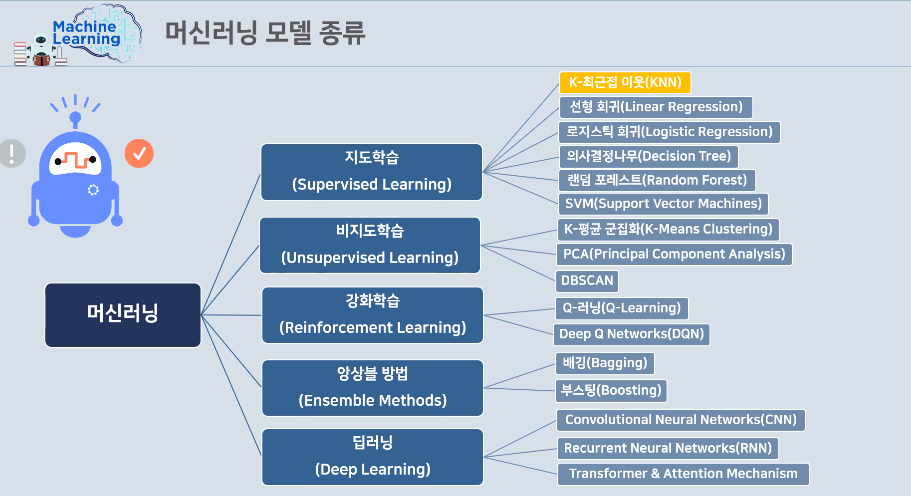

### KNN ( K - 최근접 이웃 알고리즘 )
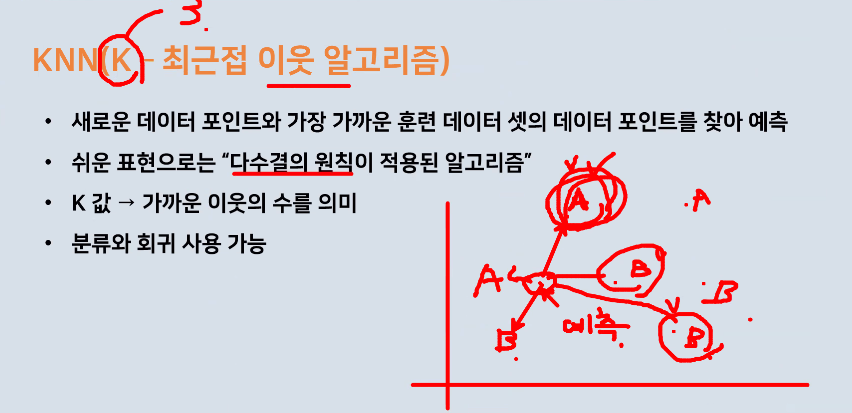
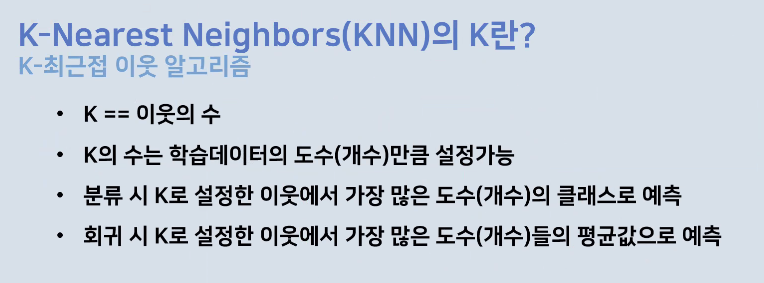
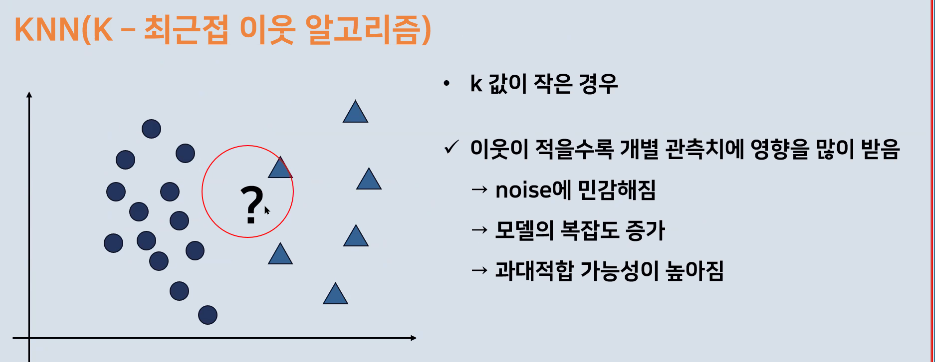
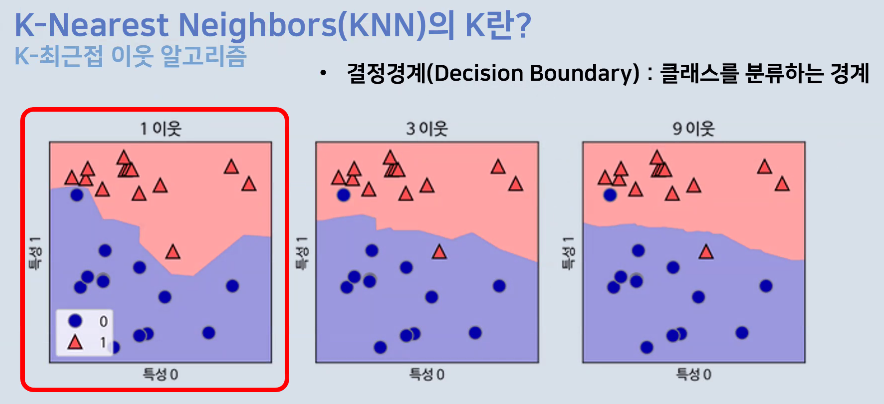
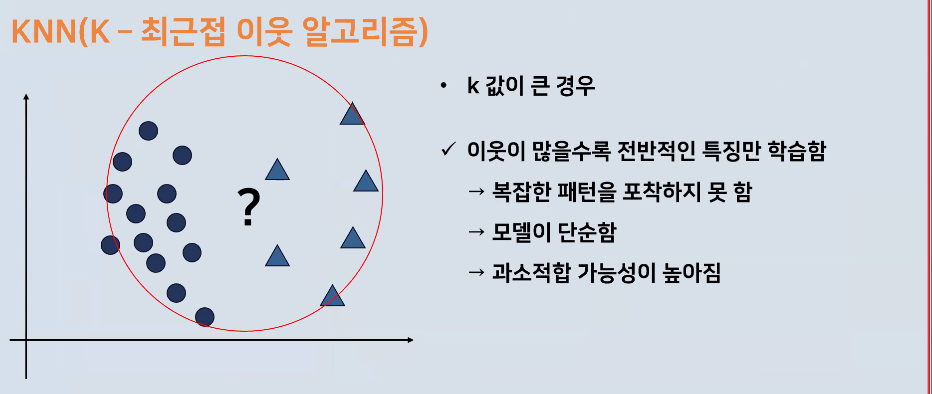

### KNN(K Nearest Neighbors) 알고리즘
- 새로운 데이터 포인트를 예측할 때, 가장 가까운 훈련 데이터셋의 데이터포인트(관측치)를 찾아 예측 수행
- 다수결의 원칙
- K값 => 가까운 이웃의 수를 의미
- 분류, 회귀 가능

In [2]:
# 라이브러리 불러오기 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris # iris 데이터셋 불러오기 

In [3]:
iris_data = load_iris()
iris_data

# 번치(다발) 객체 : 머신러닝 데이터셋 구조

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 문제 데이터 확인하기
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# 특성 이름 확인
iris_data['feature_names']
#  'sepal length (cm)' : 꽃받침 길이
#  'sepal width (cm)' : 꽃받침 너비
#  'petal length (cm)' : 꽃잎 길이
#  'petal width (cm)' : 꽃잎 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# 정답데이터 확인하기
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 정답데이터의 이름 확인
iris_data['target_names']
# setosa == 0, versicolor == 1, verginica == 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# 데이터 기술통계량 확인
iris_data['DESCR']
# 이스케이프 코드 => print 사용
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 데이터 분리 
- sklearn에서 제공되는 데이터셋은 정제되어 있음 ! => 별도로 전처리가 필요하진 않음
- 3,4 단계 생략 

In [10]:
# iris 데이터(mdarray)를 DataFrame으로 만들어주기 
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
X = iris_df
y = iris_data['target']

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.model_selection import train_test_split
# train, test 분리 도구

In [22]:
 # train_test_split(문제), y(정답), test_size = 0.3
 # 알아서 훈련용, 테스트용으로 나누어주는 도구 => 실행시킬때마다 다르게 쪼개줌 => 고정하기 위해 random_state 설정
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3, 
                                                     random_state=2024,
                                                     stratify=y)
# 랜더샘플러 : 실행할 때마다 값이 바뀌게 됨 
# 학습데이터셋, 테스트셋이 매번 변경된다면, 정확도를 확인하느느 것이 의미가 없어짐 (변수 발생) => random_state로 난수 고정 


# stratify = y : 분류시에만 활용, 클래스 비율에 따라 데이터 분할
# train과 test 간 클래스 균형을 맞추어 데이터 분류 


X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
86,6.7,3.1,4.7,1.5
148,6.2,3.4,5.4,2.3
143,6.8,3.2,5.9,2.3
12,4.8,3.0,1.4,0.1
33,5.5,4.2,1.4,0.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
26,5.0,3.4,1.6,0.4
49,5.0,3.3,1.4,0.2
101,5.8,2.7,5.1,1.9


In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [21]:
# 0: 세토사
# 1: 버지컬러
# 2: 버지니카

# value_counts() : 고유값들의 빈도수를 반환 

pd.Series(y_train).value_counts()

1    38
2    35
0    32
Name: count, dtype: int64

In [20]:
pd.Series(y_test).value_counts()

0    18
2    15
1    12
Name: count, dtype: int64

##### 모델링
- knn

In [24]:
# 모델 객체 생성
knn = KNeighborsClassifier()

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# 모델 예측
pre = knn.predict(X_test)

In [29]:
#  모델 평가
accuracy_score(y_test, pre)

0.9333333333333333

#### 하이퍼파라미터를 따른 정확도를 시각화

In [30]:
knn.predict(X_test)

array([0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0,
       0])

In [31]:
# 1~99까지의 값
n_set = range(1,50)
# train 과 test의 정확도를 담아줄 list 생성
train_list = []
test_list = []

for k in n_set :
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    # train 데이터 정확도 저장
    train_pre =knn.predict(X_train)
    train_acc =accuracy_score(y_train, train_pre)
    train_list.append(train_acc)
    # test 데이터 정확도 저장
    test_pre =knn.predict(X_test)
    test_acc =accuracy_score(y_test, test_pre)
    test_list.append(test_acc)

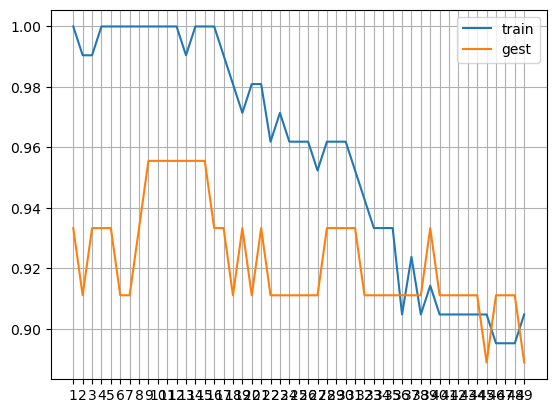

In [32]:
# 데이터 시각화
# 선그래프
plt.figure

plt.plot(n_set, train_list, label = "train")
plt.plot(n_set, test_list, label = 'gest')

plt.grid()
plt.xticks(range(1,50))
plt.legend()

plt.show()